In [4]:
#import library

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [5]:
#connect mysql

import mysql.connector

mydb= mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='',
    database='adobe_database'
)

In [6]:
#import data

query = 'select * from tabel_pendapatan'

df = pd.read_sql(query, con = mydb)
df['periode']= pd.to_datetime(df['periode'])
df.info()

C:\Users\LabSisfo\AppData\Local\Temp\ipykernel_8088\2679546594.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con = mydb)
C:\Users\LabSisfo\AppData\Local\Temp\ipykernel_8088\2679546594.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['periode']= pd.to_datetime(df['periode'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_admin    20 non-null     int64         
 1   periode     20 non-null     datetime64[ns]
 2   pendapatan  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 612.0 bytes


    id_admin  pendapatan quarter_str
0          1        2.60      2019Q1
1          2        2.74      2019Q2
2          3        2.83      2019Q3
3          4        2.99      2019Q4
4          5        2.09      2020Q1
5          6        3.13      2020Q2
6          7        3.23      2020Q3
7          8        3.42      2020Q4
8          9        3.91      2021Q1
9         10        3.84      2021Q2
10        11        3.94      2021Q3
11        12        4.11      2021Q4
12        13        4.26      2022Q1
13        14        5.31      2022Q2
14        15        4.43      2022Q3
15        16        4.53      2022Q4
16        17        4.66      2023Q1
17        18        4.82      2023Q2
18        19        4.89      2023Q3
19        20        5.05      2023Q4


<Axes: title={'center': 'Pendapatan Adobe per Tahun (dalam Miliar USD)'}, xlabel='periode', ylabel='pendapatan'>

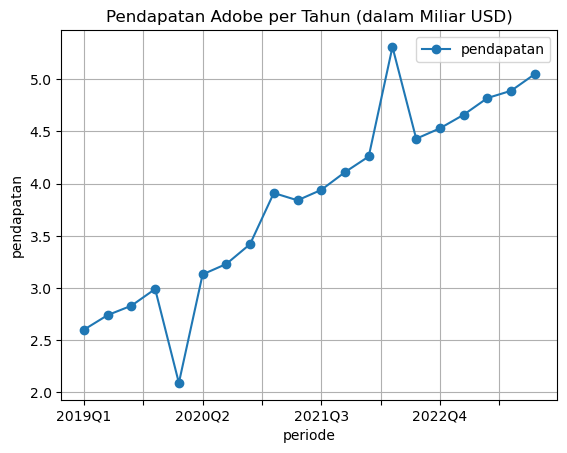

In [7]:
#plot original data

df['quarter'] = df['periode'].dt.to_period('Q')
df = df.drop(columns=['periode'])
df['quarter_str'] = df['quarter'].astype(str)
df = df.drop(columns=['quarter'])
print(df)
df.plot('quarter_str', 'pendapatan', title='Pendapatan Adobe per Tahun (dalam Miliar USD)', marker='o', xlabel='periode', ylabel='pendapatan', grid=True)

In [8]:
#train and test data
train = df.iloc[:16]
test = df.iloc[16:]

#forecasting
model_additive = sm.tsa.ExponentialSmoothing(df['pendapatan'], trend='add', seasonal='add', seasonal_periods=4)
tes_model_additive = model_additive.fit()
print(tes_model_additive.summary())

forecast_additive = tes_model_additive.forecast(steps=20)

#MAPE
MAPE_additive = mean_absolute_percentage_error(df.pendapatan, forecast_additive)
print(MAPE_additive)

#add forecasted years to dataframe
additive = {'quarter_str': ['2024Q1', '2024Q2', '2024Q3', '2024Q4',
                               '2025Q1', '2025Q2', '2025Q3', '2025Q4',
                               '2026Q1', '2026Q2', '2026Q3', '2026Q4',
                               '2027Q1', '2027Q2', '2027Q3', '2027Q4',
                               '2028Q1', '2028Q2', '2028Q3', '2028Q4', ],
                   'Peramalan': forecast_additive}

df_additive = pd.DataFrame(additive)

                       ExponentialSmoothing Model Results                       
Dep. Variable:               pendapatan   No. Observations:                   20
Model:             ExponentialSmoothing   SSE                              1.810
Optimized:                         True   AIC                            -32.049
Trend:                         Additive   BIC                            -24.083
Seasonal:                      Additive   AICC                            -7.605
Seasonal Periods:                     4   Date:                 Tue, 22 Oct 2024
Box-Cox:                          False   Time:                         05:52:22
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level              1.4901e-08                alpha                 True
smoothing_trend          

In [9]:
df = pd.concat([df, df_additive], ignore_index=True)

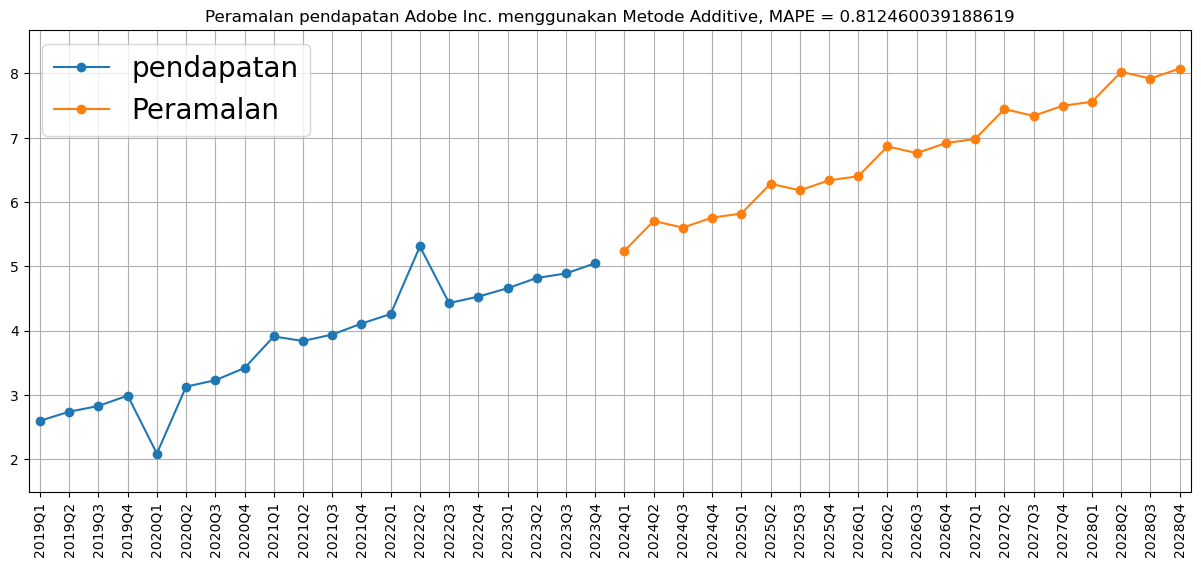

In [10]:
#plotting, additive

plt.figure(figsize=(15,6))
plt.title(f'Peramalan pendapatan Adobe Inc. menggunakan Metode Additive, MAPE = {MAPE_additive}')
plt.margins(x=0.01, y=0.1)
plt.grid(True)

x = df['quarter_str']
y1 = df['pendapatan']
y2 = df['Peramalan']

plt.plot(x, y1, label='pendapatan', marker='o')
plt.plot(x, y2, label='Peramalan', marker='o')
plt.xticks(rotation=90)
plt.legend(fontsize=20)